In [39]:
def find_period(a, n):
    x = 0
    temp = 1

    started = False

    while temp != 1 or not started:
        temp *= a
        temp %= n
        print(f"x = {x}, f(x) = {temp}")

        started = True

In [40]:
find_period(5, 63)

x = 0, f(x) = 5
x = 0, f(x) = 25
x = 0, f(x) = 62
x = 0, f(x) = 58
x = 0, f(x) = 38
x = 0, f(x) = 1


In [41]:
def euclidean_algorithm(a, b):
    if a < b:
        temp = a
        a = b
        b = temp

    iteration = 1

    while b != 0:
        temp = a
        a = b
        b = temp % b
        print(f"iteration = {iteration}, a = {a}, b = {b}")

    return a

    

    

In [42]:
euclidean_algorithm(1242, 242)

iteration = 1, a = 242, b = 32
iteration = 1, a = 32, b = 18
iteration = 1, a = 18, b = 14
iteration = 1, a = 14, b = 4
iteration = 1, a = 4, b = 2
iteration = 1, a = 2, b = 0


2

In [43]:
euclidean_algorithm(126, 63)

iteration = 1, a = 63, b = 0


63

In [44]:
find_period(11, 63)

x = 0, f(x) = 11
x = 0, f(x) = 58
x = 0, f(x) = 8
x = 0, f(x) = 25
x = 0, f(x) = 23
x = 0, f(x) = 1


In [45]:
euclidean_algorithm(1332, 63)

iteration = 1, a = 63, b = 9
iteration = 1, a = 9, b = 0


9

In [46]:
euclidean_algorithm(1330, 63)

iteration = 1, a = 63, b = 7
iteration = 1, a = 7, b = 0


7

In [47]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Gate, library
from qiskit.compiler import transpile


import matplotlib.pyplot as plt

import numpy as np

def visualize_result(res):
    n_qubit = len(list(res.keys())[0])
    for i in range(2 ** n_qubit):
        label ="{0:b}".format(i).rjust(n_qubit, '0')
        if not label in res.keys():
            res[label] = 0
    
    sorted_res = dict(sorted(res.items()))

    print(sorted_res)

    plt.figure(figsize=(10,6))
    plt.title("Counts")
    plt.ylabel("Frequency")
    plt.xlabel("Measured State")
    plt.bar(sorted_res.keys(), sorted_res.values(), color='green')

def qft(circuit, b_qubit_count, c_qubit_count):
    for i in range(c_qubit_count + b_qubit_count - 1, b_qubit_count - 1, -1):
        circuit.h(i)
        for j in range(i - 1, b_qubit_count - 1, -1):
            circuit.cp(-2 * np.pi / np.pow(2, 2 - (j- (i-1))), j, i)

    for i in range(b_qubit_count, b_qubit_count + int(c_qubit_count / 2)):
        circuit.swap(i, b_qubit_count + c_qubit_count - (i - b_qubit_count) - 1)

def shor_oracle(circuit, n, function):
    matrix = np.zeros((2 ** (3 * n), 2 ** (3 * n)))
    for row in range(2 ** (3 * n)):
        for col in range(2 ** (3 * n)):
            xcol = col >> n 
            ycol = col & ((2 ** n) - 1)
            xrow = row >> n 
            yrow = row & ((2 ** n) - 1)
            #print(f"Row = {row}, Col = {col}, x = {x}, y = {y}, f(x) = {function(x)}, f(x)^y = {function(x) ^ y}")
            if xrow == xcol and function(xcol) ^ ycol == yrow:
                matrix[row][col] = 1
    
    print(matrix)
    print(matrix.shape)
    gate = library.UnitaryGate(matrix)

    circuit.append(gate, list(range(3 * n)))


def shor_circuit(n, function):
    # circuit
    qr = QuantumRegister(3 * n)
    cr = ClassicalRegister(3 * n)

    qc = QuantumCircuit(qr, cr)

    qc.h(list(range(n, 3 * n)))

    shor_oracle(qc, n, function)

    qft(qc, n, 2 * n)

    qc.measure(list(range(n)), list(range(n)))
    qc.measure(list(range(n + 1 , 3 * n)), list(range(n + 1 , 3 * n)))

    return qc



[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(512, 512)
{'000000000': 0, '000000001': 25318, '000000010': 0, '000000011': 24880, '000000100': 0, '000000101': 0, '000000110': 0, '000000111': 0, '000001000': 0, '000001001': 0, '000001010': 0, '000001011': 0, '000001100': 0, '000001101': 0, '000001110': 0, '000001111': 0, '000010000': 0, '000010001': 0, '000010010': 0, '000010011': 0, '000010100': 0, '000010101': 0, '000010110': 0, '000010111': 0, '000011000': 0, '000011001': 0, '000011010': 0, '000011011': 0, '000011100': 0, '000011101': 0, '000011110': 0, '000011111': 0, '000100000': 0, '000100001': 0, '000100010': 0, '000100011': 0, '000100100': 0, '000100101': 0, '000100110': 0, '000100111': 0, '000101000': 0, '000101001': 0, '000101010': 0, '000101011': 0, '000101100': 0, '000101101': 0, '000101110': 0, '000101111': 0, '000110000': 0, '000110001': 0, '000110010': 0, '0001100

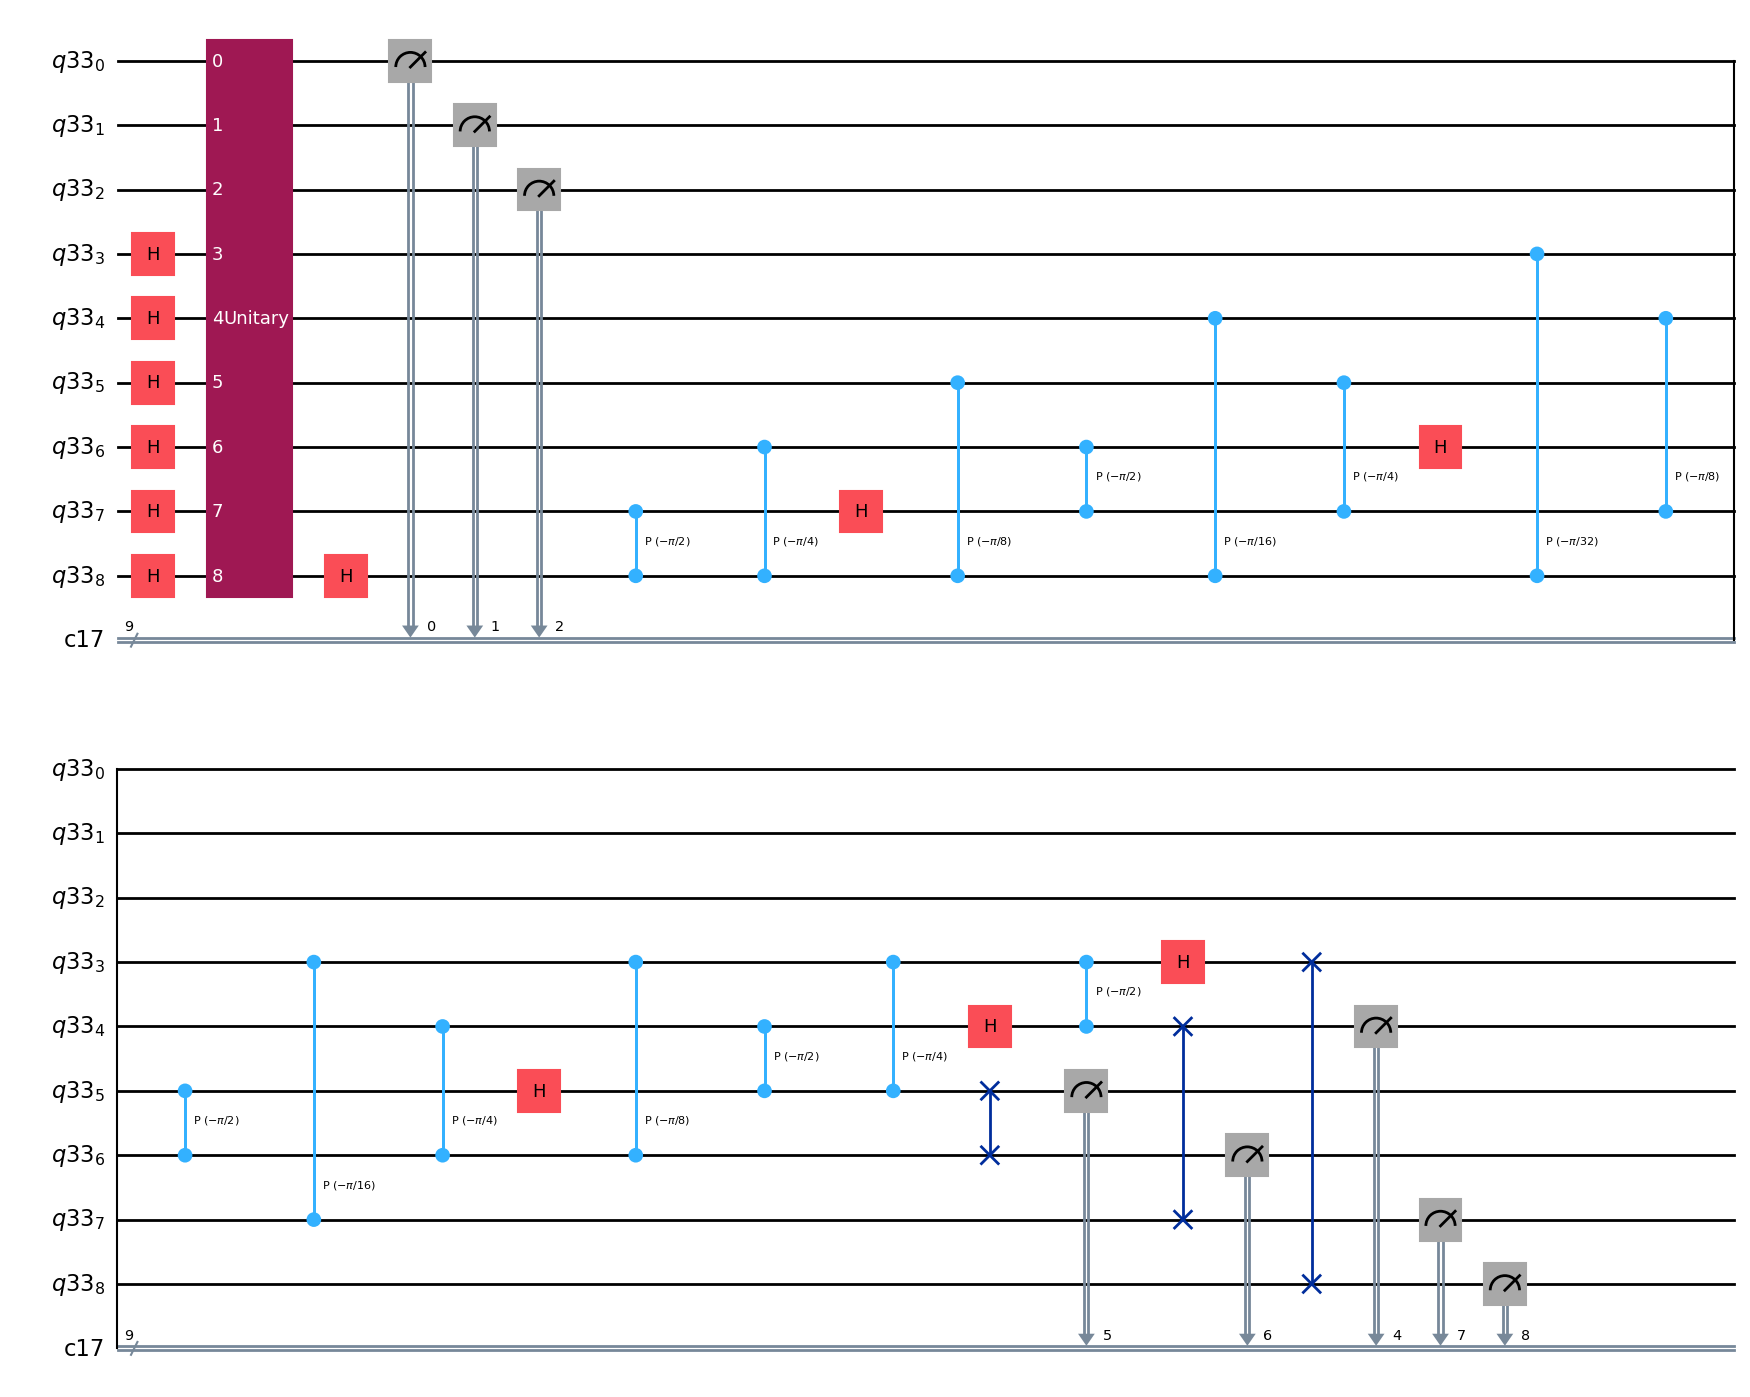

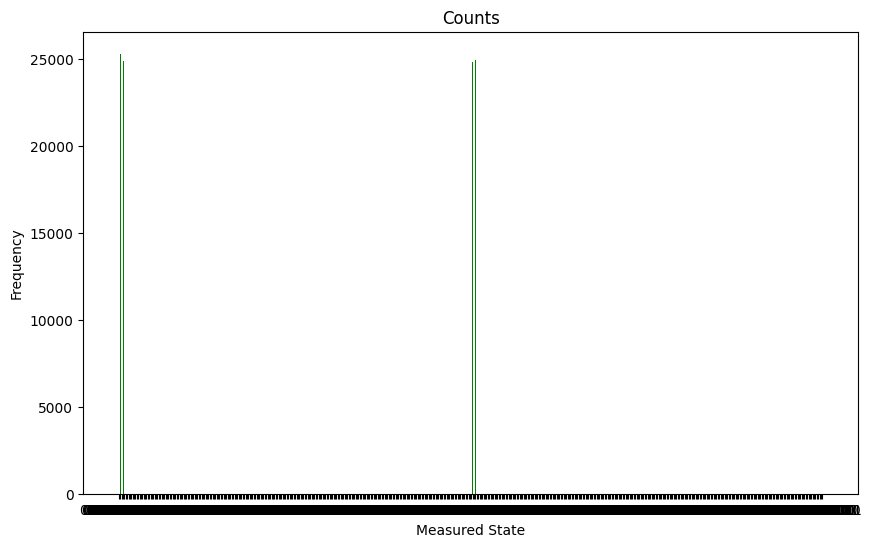

In [50]:
def func(x):
    return (3 ** x) % 4

qc = shor_circuit(3, func)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

In [49]:
find_period(3, 4)

x = 0, f(x) = 3
x = 0, f(x) = 1


[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]
(8, 8)
{'000': 0, '001': 100000, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}


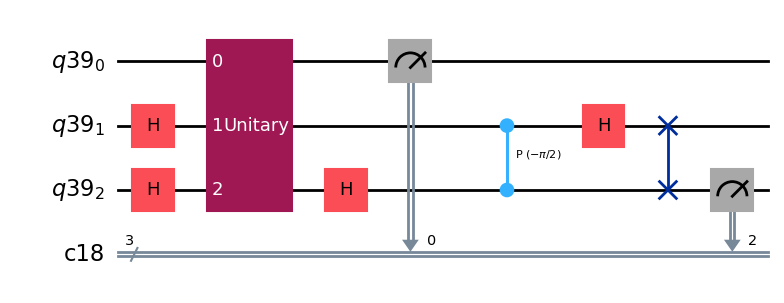

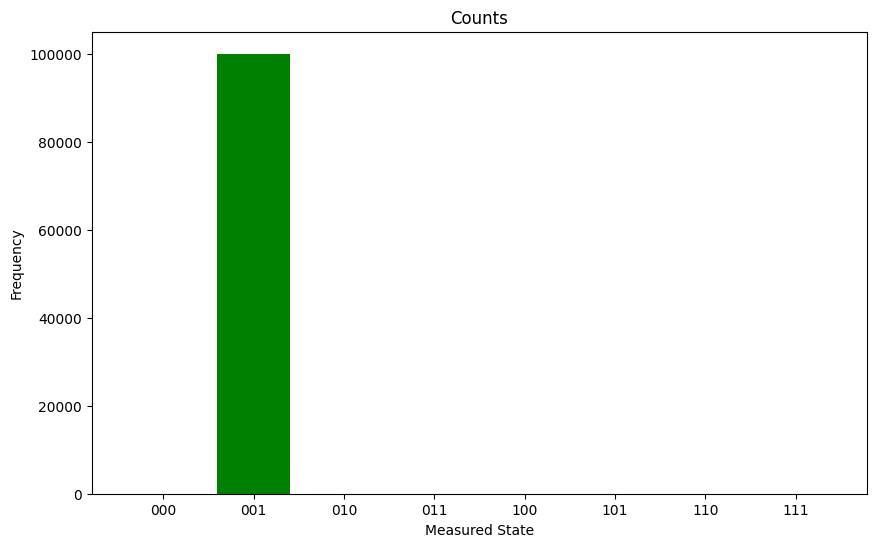

In [51]:
def func_1(x):
    return (1 ** x) % 2

qc = shor_circuit(1, func_1)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(64, 64)
{'000000': 0, '000001': 24782, '000010': 0, '000011': 25085, '000100': 0, '000101': 0, '000110': 0, '000111': 0, '001000': 0, '001001': 0, '001010': 0, '001011': 0, '001100': 0, '001101': 0, '001110': 0, '001111': 0, '010000': 0, '010001': 0, '010010': 0, '010011': 0, '010100': 0, '010101': 0, '010110': 0, '010111': 0, '011000': 0, '011001': 0, '011010': 0, '011011': 0, '011100': 0, '011101': 0, '011110': 0, '011111': 0, '100000': 0, '100001': 25054, '100010': 0, '100011': 25079, '100100': 0, '100101': 0, '100110': 0, '100111': 0, '101000': 0, '101001': 0, '101010': 0, '101011': 0, '101100': 0, '101101': 0, '101110': 0, '101111': 0, '110000': 0, '110001': 0, '110010': 0, '110011': 0, '110100': 0, '110101': 0, '110110': 0, '110111': 0, '111000': 0, '111001': 0, '111010': 0, '111011': 0, '111100': 0, '111101': 0, '111110': 0,

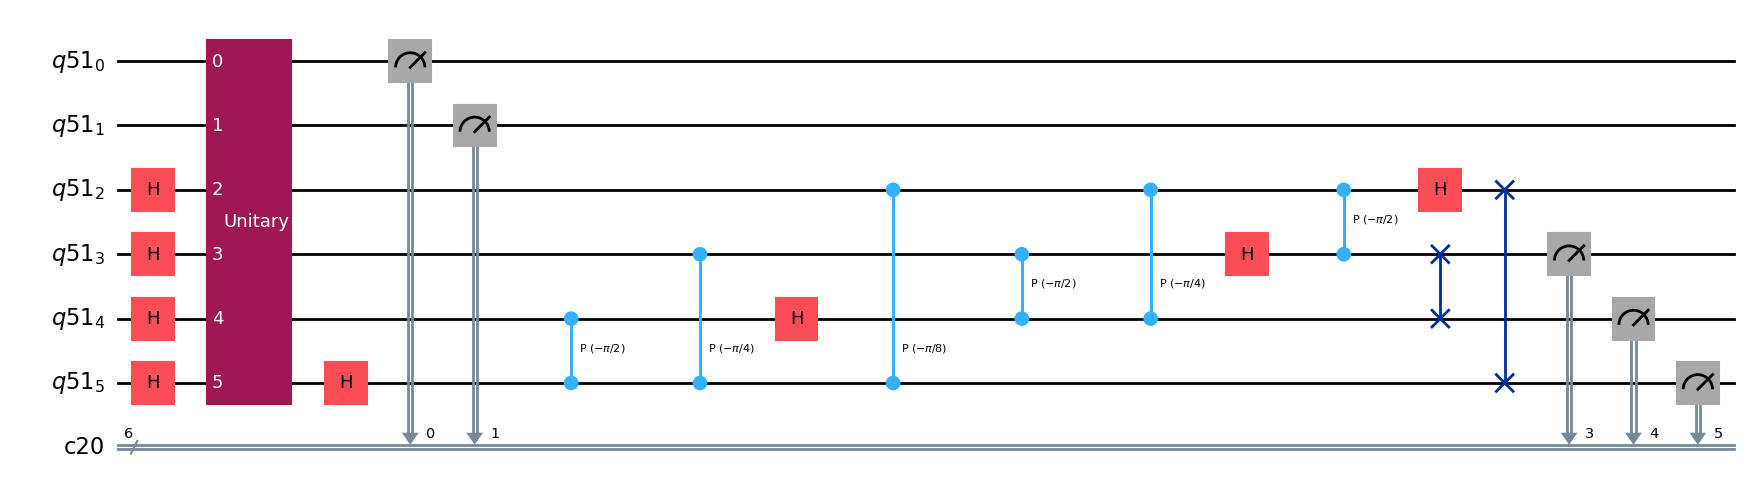

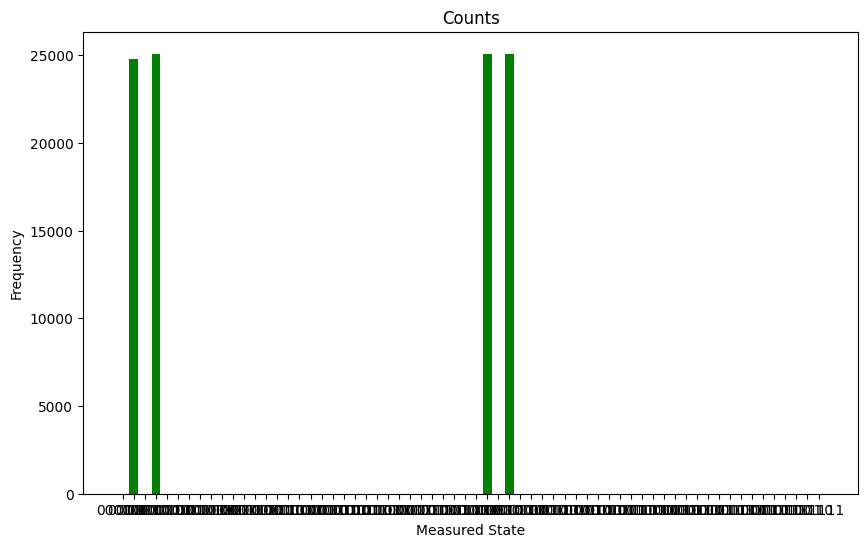

In [53]:
def func_2(x):
    return (3 ** x) % 4

qc = shor_circuit(2, func_2)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

In [55]:
def func_2(x):
    return (3 ** x) % 4

qc = shor_circuit(6, func_2)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

MemoryError: Unable to allocate 512. GiB for an array with shape (262144, 262144) and data type float64